In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/macpro/Documents/Git-Repos/data-analysis-with-sql/kickstarter-projects/ksprojects_cleaned.csv')
df.head()

,category,main_category,goal,pledged,state,backers,pct_pledged
0,Sculpture,Art,9847.0,12527.0,successful,120,1.27
1,Shorts,Film & Video,10000.0,10056.0,successful,38,1.01
2,Tabletop Games,Games,2500.0,2578.0,successful,50,1.03
3,Country & Folk,Music,1000.0,3264.0,successful,78,3.26
4,Tabletop Games,Games,35.0,4479.0,successful,82,127.97


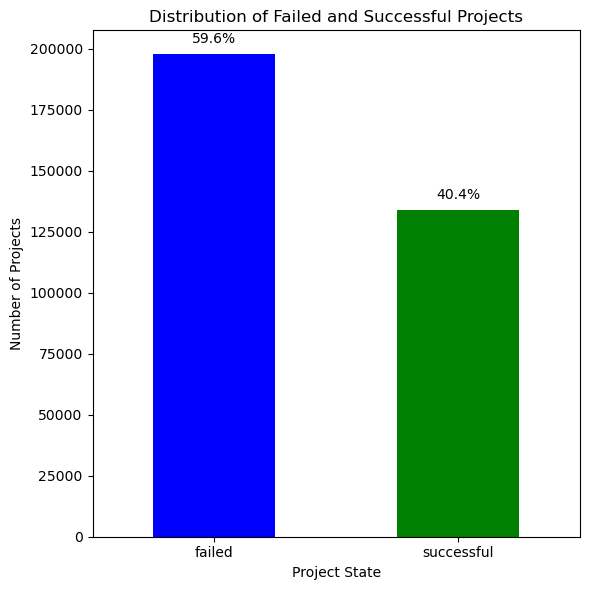

In [4]:
# Get the value counts and calculate percentages
state_counts = df['state'].value_counts()
total = state_counts.sum()
percentages = (state_counts / total) * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(6, 6))
bars = state_counts.plot(kind='bar', color=['blue', 'green'], ax=ax)

# Add labels and title
plt.title('Distribution of Failed and Successful Projects')
plt.xlabel('Project State')
plt.ylabel('Number of Projects')

# Add percentages above the bars
for i, value in enumerate(state_counts):
    ax.text(i, value + total * 0.01, f'{percentages[i]:.1f}%', ha='center', va='bottom')

# Rotate the x-axis labels horizontally
plt.xticks(rotation=0)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


In [8]:
successful_catg = df[df['category'].isin(['Software', 'Drinks', 'Gadgets', 'Sound', 
                                        'Cookbooks', 'Periodicals', 'Animation',
                                        'Typography', 'Tabletop Games', 'Academic'])]
successful_catg

,category,main_category,goal,pledged,state,backers,pct_pledged
2,Tabletop Games,Games,2500.0,2578.00,successful,50,1.03
4,Tabletop Games,Games,35.0,4479.00,successful,82,127.97
16,Animation,Film & Video,7500.0,19631.22,successful,145,2.62
19,Drinks,Food,10000.0,10200.00,successful,79,1.02
27,Drinks,Food,17500.0,20987.00,successful,192,1.20
...,...,...,...,...,...,...,...
331629,Software,Technology,2500.0,929.66,failed,27,0.37
331639,Tabletop Games,Games,300.0,2366.00,successful,139,7.89
331647,Tabletop Games,Games,5000.0,33855.00,successful,203,6.77
331658,Tabletop Games,Games,12000.0,22966.00,successful,361,1.91


In [28]:
successful_categories = df.loc[df['state']=='successful', 'main_category']
print("Successful project categories: ", successful_categories.unique())

Successful project categories:  ['Art' 'Film & Video' 'Games' 'Music' 'Publishing' 'Photography' 'Design'
 'Food' 'Comics' 'Fashion' 'Dance' 'Theater' 'Technology' 'Journalism'
 'Crafts']


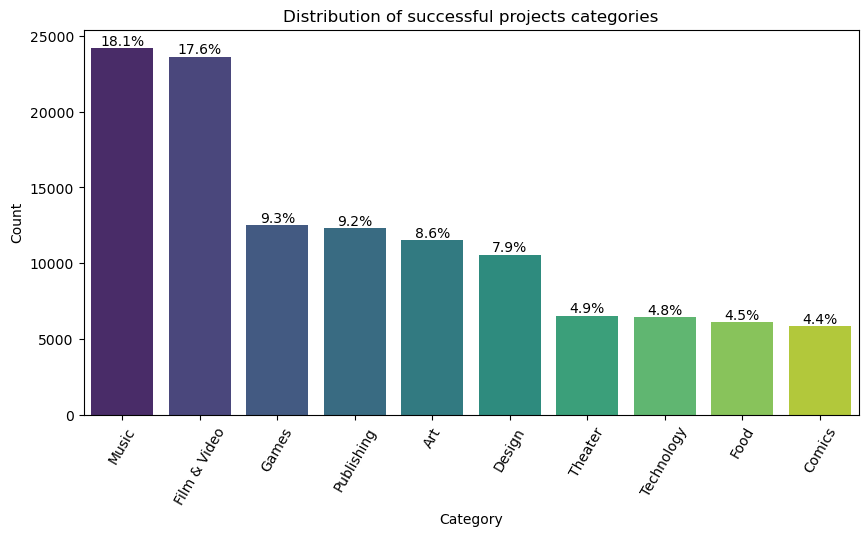

In [33]:
# Count the occurances of each category
successful_category_count = successful_categories.value_counts()

# Select top 10 categories
top_n = 10
top_10_categories = successful_category_count[:top_n]

# Total successful projects
total_successful_projects = successful_category_count.sum()

# Plot the distribution of top 10 categories
plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')

# Add percentages on top of bars
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_successful_projects:.1f}%"  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of successful projects categories')
plt.xticks(rotation=60)
plt.show()